In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle
!cp /kaggle/input/kagglejson/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/kaggle/input/kagglejson/kaggle.json': No such file or directory


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!pip install kaggle

In [5]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /kaggle/working


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99%|██████████████████████████████████████▊| 2.68G/2.70G [00:09<00:00, 308MB/s]
100%|███████████████████████████████████████| 2.70G/2.70G [00:09<00:00, 313MB/s]


In [6]:
%%capture
!unzip /kaggle/working/new-plant-diseases-dataset.zip -d /kaggle/working


In [ ]:

# Configuration of the image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalization: scales pixel values between 0 and 1
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift up to 20% of the width
    height_shift_range=0.2,  # Random vertical shift up to 20% of the height
    zoom_range=0.2,  # Random zoom up to 20%
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Filling missing pixels with the nearest value
)

# Generator for the validation or test set (without augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Only normalization

# Load images from the file system
train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",  # Path to the training dataset
    target_size=(256, 256),  # Resize images to 224x224
    batch_size=32,  # Number of images per batch
    class_mode='categorical' , # Type of labels: 'categorical' for multi-class classification
    shuffle=True
)

valid_generator = validation_datagen.flow_from_directory(
    "/kaggle/working/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


In [11]:
# Import necessary libraries

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  BatchNormalization, GlobalAveragePooling2D



import matplotlib.pyplot as plt


In [12]:
def base_cnn_model(input_shape=(256, 256, 3), num_classes=38):

    """

    Custom CNN model for plant disease detection.

    :param input_shape: Tuple representing the shape of input images.

    :param num_classes: Integer, number of output classes.

    :return: Compiled Keras model.

    """

    model = Sequential()



    # Convolutional Block 1

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 2

    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 3

    model.add(Conv2D(128, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Fully Connected Layers

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.5))  # Dropout for regularization

    model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification





    return model


In [13]:
# Create the CNN model

model = base_cnn_model(input_shape=(256, 256, 3), num_classes=38)



# Display the model architecture

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,594,470 (112.89 MB)

 Trainable params: 29,594,470 (112.89 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:


def improved_cnn_model(input_shape=(256, 256, 3), num_classes=38):

    """

    Improved CNN model for plant disease detection.

    :param input_shape: Tuple representing the shape of input images.

    :param num_classes: Integer, number of output classes.

    :return: Compiled Keras model.

    """

    model = Sequential()



    # Convolutional Block 1

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 2

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 3

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 4

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Global Average Pooling instead of Flatten

    model.add(GlobalAveragePooling2D())



    # Fully Connected Layers

    model.add(Dense(512, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.3))



    # Output Layer

    model.add(Dense(num_classes, activation='softmax'))



    return model


In [16]:
# Create the improved CNN model

improved_model = improved_cnn_model(input_shape=(256, 256, 3), num_classes=38)



# Display the improved model architecture

improved_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 663,014 (2.53 MB)

 Trainable params: 662,054 (2.53 MB)

 Non-trainable params: 960 (3.75 KB)

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
import torch.optim.lr_scheduler as lr_scheduler


# Define the schedule
initial_learning_rate = 1e-5
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=10000,  # Number of steps before decay
    decay_rate=0.96,    # Decay factor
    staircase=True      # Apply decay in discrete intervals
)
modelloadedIMPROVED = load_model('/kaggle/input/finalimproved-20-128-1e-5/final_improved_model1010128.h5')

# Compile the model with the schedule
modelloadedIMPROVED.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
               metrics=[
                'accuracy',  # Default accuracy
                tf.keras.metrics.Precision(name='precision'),  # Precision metric
                tf.keras.metrics.Recall(name='recall'),        # Recall metric
                tf.keras.metrics.AUC(name='auc'),             # AUC metric
            ])

modelloadedBASIC = load_model('/kaggle/input/finalBASIC-20-128-1e-5/final_improved_model1010128.h5')

# Compile the model with the schedule
modelloadedBASIC.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
               metrics=[
                'accuracy',  # Default accuracy
                tf.keras.metrics.Precision(name='precision'),  # Precision metric
                tf.keras.metrics.Recall(name='recall'),        # Recall metric
                tf.keras.metrics.AUC(name='auc'),             # AUC metric
            ])

In [ ]:
#was trained for 20 epochs then loaded for an additional 20 epochs for a total of 40 epochs
historyModelImproved = modelloadedIMPROVED.fit(
    train_generator,  # flow from ImageDataGenerator
    validation_data=valid_generator,
    epochs=40,
    initial_epoch=20,
    batch_size=128
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 925s 413ms/step - accuracy: 0.8635 - auc: 0.9957 - loss: 0.4467 - precision: 0.9122 - recall: 0.8094 - val_accuracy: 0.7755 - val_auc: 0.9682 - val_loss: 0.9551 - val_precision: 0.8084 - val_recall: 0.7444
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 887s 402ms/step - accuracy: 0.8704 - auc: 0.9958 - loss: 0.4255 - precision: 0.9150 - recall: 0.8230 - val_accuracy: 0.7978 - val_auc: 0.9774 - val_loss: 0.7709 - val_precision: 0.8321 - val_recall: 0.7711
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 883s 401ms/step - accuracy: 0.8768 - auc: 0.9961 - loss: 0.4085 - precision: 0.9216 - recall: 0.8303 - val_accuracy: 0.7852 - val_auc: 0.9720 - val_loss: 0.8837 - val_precision: 0.8199 - val_recall: 0.7557
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 881s 400ms/step - accuracy: 0.8836 - auc: 0.9964 - loss: 0.3877 - precision: 0.9233 - recall: 0.8398 - val_accuracy: 0.7892 - val_auc: 0.9739 - val_loss: 0.8405 - val_precision: 0.8231 - val_recall: 0.7625
Epoch 5/20
2197/219

In [24]:
# Save the final model after training
modelloadedIMPROVED.save('FinalModelImproved40_128_1e-5.pkl.h5')

# Optionally, save the history for later analysis
import pickle

with open('FinalModelImproved40_128_1e-5combined_history.pkl', 'wb') as file:
    pickle.dump(historyModelImproved.history, file)

In [ ]:
#was trained for 20 epochs then loaded for an additional 20 epochs for a total of 40 epochs
historyModelBasic = modelloadedBASIC.fit(
    train_generator,  # flow from ImageDataGenerator
    validation_data=valid_generator,
    epochs=40,
    initial_epoch=20,
    batch_size=128
)

In [ ]:
# Save the final model after training
modelloadedIMPROVED.save('FinalModelBasic40_128_1e-5.h5')

# Optionally, save the history for later analysis
import pickle

with open('FinalModelBasic40_128_1e-5combined_history.pkl', 'wb') as file:
    pickle.dump(historyModelImproved.history, file)

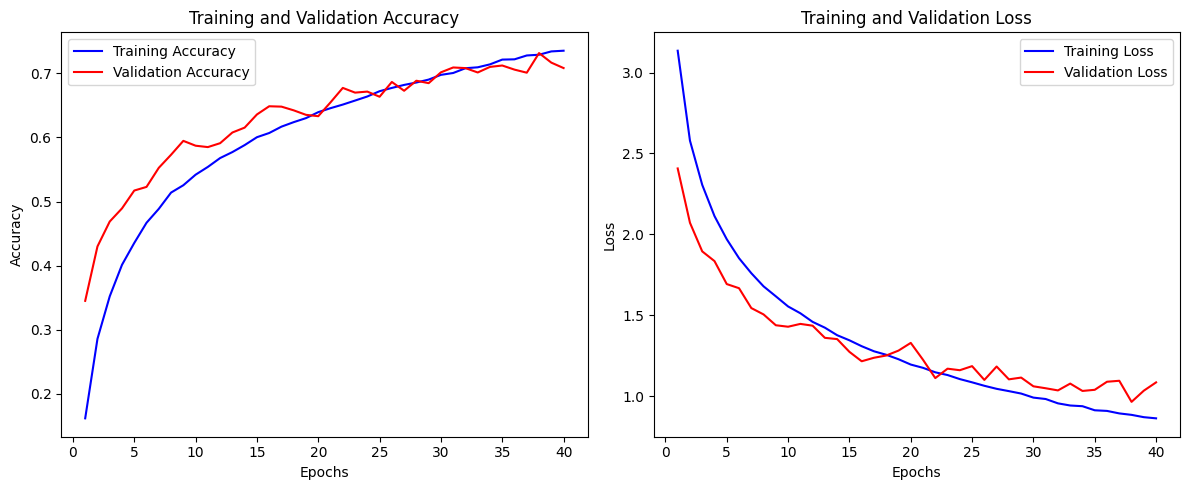

In [2]:
import pickle
import matplotlib.pyplot as plt
### BASELINE CNN

# Function to combine histories
# def combine_histories(histories):
#     combined_history = {
#         'accuracy': [],
#         'val_accuracy': [],
#         'loss': [],
#         'val_loss': []
#     }
#     for hist in histories:
#         combined_history['accuracy'].extend(hist['accuracy'])
#         combined_history['val_accuracy'].extend(hist['val_accuracy'])
#         combined_history['loss'].extend(hist['loss'])
#         combined_history['val_loss'].extend(hist['val_loss'])
#     return combined_history

# Function to load history from pickle file
def load_history(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# Function to save history to pickle file
def save_history_to_pickle(history, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(history, f)
    print(f"History saved to {file_path}")

# Load histories from .pkl files
history1 = load_history('/kaggle/input/baseline-improvedpkl/FinalModelBasic40_128_1e-5combined_history.pkl')

# Plot the combined history
def plot_training_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_training_history(history1)


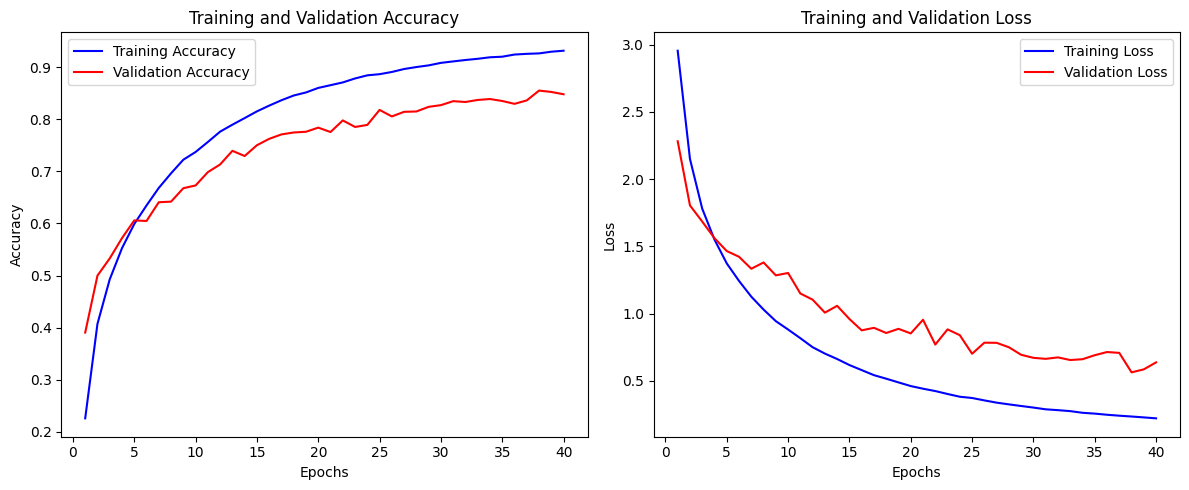

In [3]:
import pickle
import matplotlib.pyplot as plt
#### IMPROVED CNN
# Load histories from .pkl file
history1 = load_history('/kaggle/input/baseline-improvedpkl/FinalModelImproved40_128_1e-5combined_history.pkl')

plot_training_history(history1)
